https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
#from torch import nn
#from torch import optim
#import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

##Load Dataset

In [3]:
data_dir = '/content/drive/MyDrive/datasetlight'
batch_size = 64

def load_split_train_test(datadir, valid_size = .2, batch_size = batch_size):
    train_transforms = transforms.Compose([transforms.Resize(224), transforms.ToTensor(),])    
    test_transforms = transforms.Compose([transforms.Resize(224), transforms.ToTensor(),])    
    
    train_data = datasets.ImageFolder(datadir, transform=train_transforms)
    test_data = datasets.ImageFolder(datadir,transform=test_transforms)    
    
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)

 
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=batch_size)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=batch_size)
    return trainloader, testloader

trainloader, testloader = load_split_train_test(data_dir, .2)
print(trainloader.dataset.classes)
print(f'{len(trainloader.dataset.classes)} classes in total')
print(f'{len(trainloader)} train loaders')
print(f'{len(testloader)} test loaders')

['0', '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
11 classes in total
12 train loaders
3 test loaders


##Show Dataset



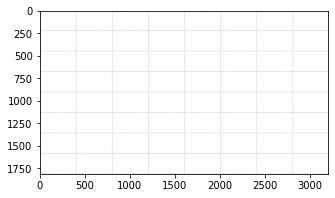

In [4]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
plt.figure(figsize = (30,3))
imshow(torchvision.utils.make_grid(images))
# print labels
#print(' '.join('%5s' % trainloader.dataset.classes[labels[j]] for j in range(8)))

##Define CNN Model

In [5]:

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc1 = nn.Linear(81408, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 11)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x


net = Net()

##Define and Loss function and optimizer 

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

##Train the model

In [14]:
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % len(trainloader) == len(trainloader) -1:    # print every 100 mini-batches
            print(f'epoch: {epoch}, loss: {running_loss}')
            running_loss = 0.0

print('Finished Training')

epoch: 0, loss: 27.93799114227295
epoch: 1, loss: 27.924630165100098
epoch: 2, loss: 27.931166172027588
epoch: 3, loss: 27.929980993270874
epoch: 4, loss: 27.927740812301636
epoch: 5, loss: 27.933940649032593
epoch: 6, loss: 27.927835702896118
epoch: 7, loss: 27.92843985557556
epoch: 8, loss: 27.937441110610962
epoch: 9, loss: 27.9333655834198
epoch: 10, loss: 27.94097590446472
epoch: 11, loss: 27.923192262649536
epoch: 12, loss: 27.928394079208374
epoch: 13, loss: 27.92748212814331
epoch: 14, loss: 27.93389630317688
epoch: 15, loss: 27.9248104095459
epoch: 16, loss: 27.9254367351532
epoch: 17, loss: 27.92178440093994
epoch: 18, loss: 27.93949007987976
epoch: 19, loss: 27.93929958343506
epoch: 20, loss: 27.93837261199951
epoch: 21, loss: 27.933926343917847
epoch: 22, loss: 27.941399335861206
epoch: 23, loss: 27.933343172073364
epoch: 24, loss: 27.928093433380127
epoch: 25, loss: 27.929741621017456
epoch: 26, loss: 27.92938995361328
epoch: 27, loss: 27.931398153305054
epoch: 28, loss: 2

###save the trained model

In [15]:
PATH = './Dots.pth'
torch.save(net.state_dict(), PATH)

#Test the model

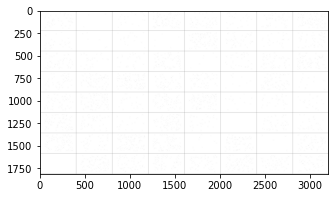

GroundTruth:  51-60  1-10 21-30 81-90 41-50 21-30 41-50 91-100


In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
plt.figure(figsize = (30,3))
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % trainloader.dataset.classes[labels[j]] for j in range(8)))

In [17]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [18]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % trainloader.dataset.classes[predicted[j]]
                              for j in range(8)))


Predicted:  81-90 81-90 81-90 81-90 81-90 81-90 81-90 81-90


In [20]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 12 %


In [21]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in trainloader.dataset.classes}
total_pred = {classname: 0 for classname in trainloader.dataset.classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[trainloader.dataset.classes[label]] += 1
            total_pred[trainloader.dataset.classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class 0     is: 0.0 %
Accuracy for class 1-10  is: 0.0 %
Accuracy for class 11-20 is: 0.0 %
Accuracy for class 21-30 is: 0.0 %
Accuracy for class 31-40 is: 0.0 %
Accuracy for class 41-50 is: 0.0 %
Accuracy for class 51-60 is: 0.0 %
Accuracy for class 61-70 is: 0.0 %
Accuracy for class 71-80 is: 0.0 %
Accuracy for class 81-90 is: 100.0 %
Accuracy for class 91-100 is: 0.0 %


###Confusion matrix